In [2]:
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df = pandas.read_csv('data/heart.csv')

In [6]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [57]:
target_percent = sum(df['target'])/303
print(target_percent)
#We want to make sure our classifier outperforms this percentage by a significant amount

0.5445544554455446


In [5]:
train, test = train_test_split(df, test_size=0.2)

y_train = train.iloc[:,13]
x_train = train.iloc[:,0:12]

y_test = test.iloc[:,13]
x_test = test.iloc[:,0:12]

In [13]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

import time
from datetime import timedelta

start_time = time.monotonic()
gnb.fit(x_train, y_train)
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

y_pred = gnb.predict(x_test)
y_delta = abs(y_test - y_pred)
pred_error = np.sum(y_delta)/y_delta.size
print("Prediction error:", round(pred_error, 3))
pred_accuracy = 1 - pred_error
print("Prediction accuracy:", round(pred_accuracy, 3))

0:00:00.033975
Prediction error: 0.197
Prediction accuracy: 0.803


In [7]:
#k nearest neighbors
from sklearn import neighbors

#Find optimal k
k_values = list(range(1,50))
k_accuracy = []

for i in k_values:
    n_neighbors = i
    knn = neighbors.KNeighborsClassifier(n_neighbors)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    y_delta = abs(y_test - y_pred)
    pred_error = np.sum(y_delta)/y_delta.size
    pred_accuracy = 1 - pred_error
    k_accuracy.append(pred_accuracy)

29


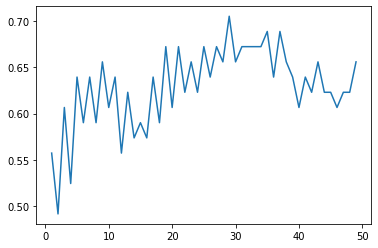

In [9]:
plt.plot(k_values, k_accuracy)

k_dic = {} 
for key in k_values: 
    for value in k_accuracy: 
        k_dic[key] = value 
        k_accuracy.remove(value)
        break
        
max_key = max(k_dic, key=k_dic.get)
print(max_key)

In [10]:
#From above, we determined the best accuracy rate is when k=24
n_neighbors = max_key

knn = neighbors.KNeighborsClassifier(n_neighbors)

import time
from datetime import timedelta

start_time = time.monotonic()
knn.fit(x_train, y_train)
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

y_pred = knn.predict(x_test)
y_delta = abs(y_test - y_pred)
pred_error = np.sum(y_delta)/y_delta.size
print("Prediction error:", round(pred_error, 3))
pred_accuracy = 1 - pred_error
print("Prediction accuracy:", round(pred_accuracy, 3))

0:00:00.003528
Prediction error: 0.295
Prediction accuracy: 0.705


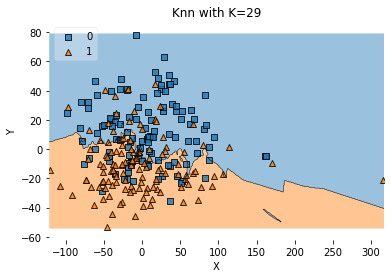

In [19]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components = 2)
x_train2 = pca.fit_transform(x_train)

y_np = y_train.to_numpy()

knn.fit(x_train2, y_train)
plot_decision_regions(x_train2, y_np, clf=knn, legend=2)# Adding axes annotations

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K='+ str(n_neighbors))
plt.show()

In [40]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)

import time
from datetime import timedelta

start_time = time.monotonic()
adaboost.fit(x_train, y_train)
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

y_pred = adaboost.predict(x_test)
y_delta = abs(y_test - y_pred)
pred_error = np.sum(y_delta)/y_delta.size
print("Prediction error:", round(pred_error, 3))
pred_accuracy = 1 - pred_error
print("Prediction accuracy:", round(pred_accuracy, 3))

0:00:00.196454
Prediction error: 0.262
Prediction accuracy: 0.738


In [46]:
feature_val = list(adaboost.feature_importances_)

feature_dic = {} 
for key in x_train.columns: 
    for value in feature_val: 
        feature_dic[key] = value 
        feature_val.remove(value)
        break

In [54]:
from tabulate import tabulate

headers = ['feature', 'importance value']

print(tabulate(feature_dic.items(), headers = headers))


feature      importance value
---------  ------------------
age                      0.19
sex                      0.04
cp                       0.04
trestbps                 0.16
chol                     0.14
fbs                      0.02
restecg                  0.01
thalach                  0.16
exang                    0.01
oldpeak                  0.14
slope                    0.04
ca                       0.05
